In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# The Data
[Read about the data here](https://www.kaggle.com/lava18/google-play-store-apps)

In [190]:
google_play_df = pd.read_csv("data/google-play-store-apps/googleplaystore.csv")
google_play_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [191]:
google_play_reviews_df = pd.read_csv("data/google-play-store-apps/googleplaystore_user_reviews.csv")
google_play_reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


# Question 1: 
Which category, in your opinion, has the best ratings? How are you measuring best ratings?


Use the `googleplaystore.csv`

# Question 2:
Is there a relationship between ratings and size? How did you measure the relationship? Why did you choose this measurement? 

Please create a scatterplot of size vs ratings to demonstrate the relationship or lack thereof. 

# For this next section, choose a Category of playstore apps

## Category Chosen: [insert here]



# Question 3:
For your category, how many genres are represented? What are their counts? Please show this with a bar chart. 

# Question 4:
What is something interesting you found about your category? 

In [172]:
print(google_play_df.describe())
print(google_play_df.info())

            Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


In [217]:
#print(google_play_df.isna().sum()) #Inital check for NaNs
#print(google_play_df['Rating'].unique()) #Shows all unique values to discover the placeholder data

google_play_df['Rating'] = google_play_df['Rating'].fillna(google_play_df['Rating'].median()) #fills the 1474 NaNs in rating with the median
google_play_df.isna().sum() #Final check for NaNs = 0
google_play_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [174]:
#google_play_df['Type'].unique()
google_play_df['Type'] = google_play_df['Type'].fillna(google_play_df['Type'].mode()) #Replaces the NaN in Type with the Mode
google_play_df['Current Ver'] = google_play_df['Current Ver'].fillna(google_play_df['Current Ver'].mode()) #Replaces the NaN in Current Ver with the Mode
google_play_df['Android Ver'] = google_play_df['Android Ver'].fillna(google_play_df['Android Ver'].mode()) #Replaces the NaN in Android Ver with the Mode

In [193]:
google_play_reviews_df['Sentiment'].unique() #count types of reviews

array(['Positive', nan, 'Neutral', 'Negative'], dtype=object)

In [175]:
#google_play_df.groupby(['Category','Genres','Android Ver']).head()
games = google_play_df.loc[google_play_df['Category'] == 'GAME'] #Accesses the Games category
#games.groupby(['Rating']).apply(lambda x: sorted(x))
games.head()



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1654,Subway Surfers,GAME,4.5,27722264,76M,"1,000,000,000+",Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1655,Candy Crush Saga,GAME,4.4,22426677,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1656,Solitaire,GAME,4.7,254258,23M,"10,000,000+",Free,0,Everyone,Card,"August 1, 2018",2.137.0,4.1 and up
1657,Bubble Shooter,GAME,4.5,148897,46M,"10,000,000+",Free,0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up


                          Rating  year  Last Update By Year  \
Android Ver Last Updated                                      
2.3 and up  2018-03-05       5.0  2018                 2018   
5.0 and up  2018-08-06       5.0  2018                 2018   
2.3 and up  2017-02-08       5.0  2017                 2017   
            2017-03-03       5.0  2017                 2017   
            2017-03-11       5.0  2017                 2017   
...                          ...   ...                  ...   
4.1 and up  2016-04-10       2.8  2016                 2016   
5.0 and up  2018-08-03       2.7  2018                 2018   
4.1 and up  2016-08-26       2.4  2016                 2016   
2.3 and up  2017-02-11       2.3  2017                 2017   
4.1 and up  2017-12-25       1.4  2017                 2017   

                          Last App Update By Year  
Android Ver Last Updated                           
2.3 and up  2018-03-05                       2018  
5.0 and up  2018-08-06  

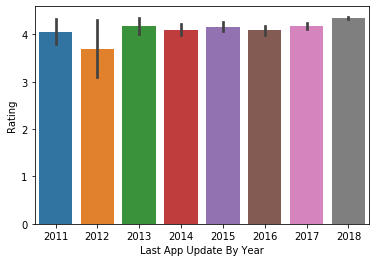

In [218]:
rating_vs_droid = games.groupby(['Android Ver', 'Last Updated']).mean() 


games['Last Updated'] = pd.to_datetime(games['Last Updated']) #Converts date fron datatype string to date
games['Last App Update By Year'] = games['Last Updated'].dt.year #extracts the year

print(rating_vs_droid.sort_values(by= ['Rating', 'Last App Update By Year' ], ascending=False)) #sorts dataframe by the review and year of app update

sns.barplot(x='Last App Update By Year', y='Rating', data=games) #Barplot of Last App Update By Year vs. App Rating


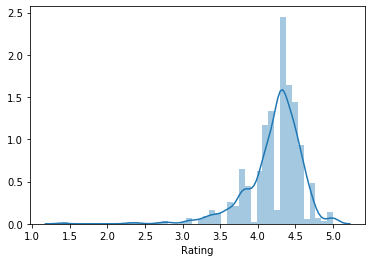

In [207]:
sns.distplot(rating_vs_droid['Rating']) #Shows the distribution across app ratings

SyntaxError: invalid syntax (<ipython-input-215-efad1811bd98>, line 1)

# Question 5:
What is something interesting you found about your category in relationship to the rest of the data? 

# Question 6:
Anything else we should know about this dataset?